In [65]:
#import dependencies
import pandas as pd
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# read in the data
df = pd.read_csv('../Bryan/trimmed_merged.csv')
df


,school_name,city,state,zip,price,bed,bath,acres,sqft,sold_year
0,PS 48 PO MICHAEL J BUCZEK,New York City,NY,10033,669000.0,2.0,1.0,0.27,870.0,2015.0
1,PS 30 WILTON,Bronx,NY,10454,799000.0,6.0,3.0,0.05,2280.0,2015.0
2,Hackettstown High School,Allamuchy Township,NJ,7840,599900.0,4.0,4.0,0.18,2450.0,2015.0
3,EDWARD A REYNOLDS WEST SIDE HIGH SCHOOL,New York City,NY,10025,5995000.0,5.0,3.0,0.03,3264.0,2015.0
4,Marlboro High School,Marlboro,NJ,7746,725000.0,4.0,4.0,0.34,2404.0,2015.0
...,...,...,...,...,...,...,...,...,...,...
47896,ADULT DIAGNOSTIC AND TREATMENT CENTER,Avenel,NJ,7001,305100.0,3.0,2.0,0.14,1542.0,2022.0
47897,ADULT DIAGNOSTIC AND TREATMENT CENTER,Avenel,NJ,7001,460000.0,4.0,4.0,0.10,1620.0,2022.0
47898,CATHERINE & COUNT BASIE MIDDLE SCHOOL 72,Jamaica,NY,11434,699999.0,4.0,3.0,0.05,1600.0,2022.0
47899,Braeburn School,West Hartford,CT,6107,399900.0,3.0,2.0,0.14,1634.0,2022.0


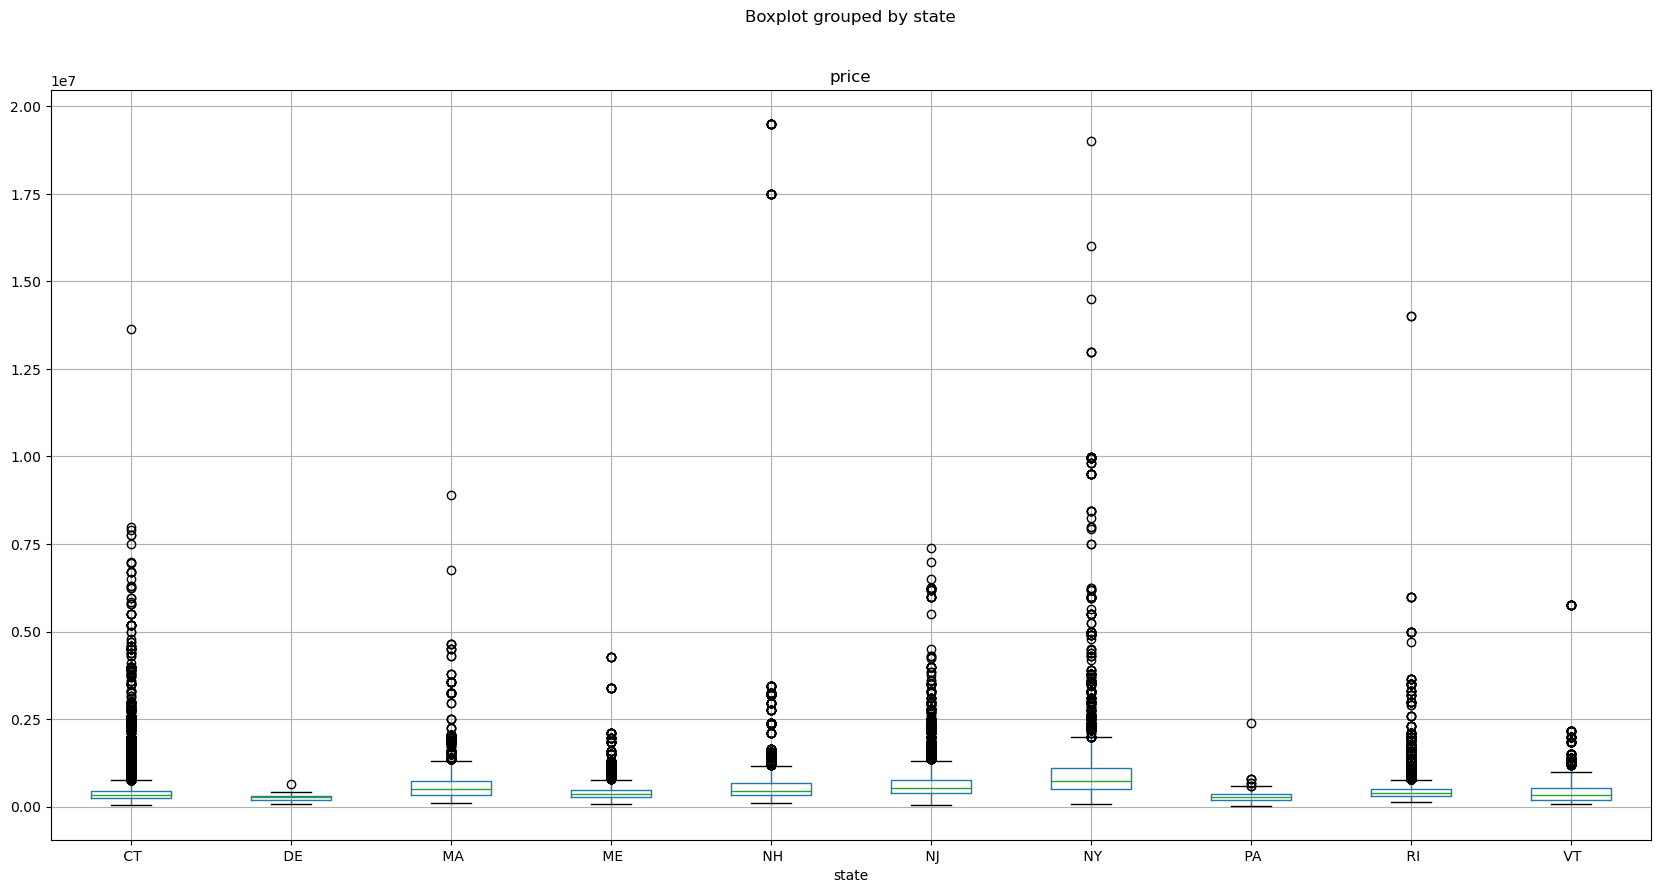

In [66]:
#Create a Boxplot for Price Column in Dataset
df.boxplot("price", by="state", figsize=(20, 10))
plt.show()

In [67]:
#Calculate upper and lower bounds for Price Column in Dataframe
quartiles = df['price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
# new_df = df.loc[(df['price'] > lower_bound) & (df['price'] < upper_bound)]
outlier_price_df = df.loc[(df['price'] < lower_bound) | (df['price'] > upper_bound)]




In [68]:
#New Dataframe with outliers removed
new_df = df.loc[(df['price'] > lower_bound) & (df['price'] < upper_bound)]
# new_df.dtypes
new_df.head()

,school_name,city,state,zip,price,bed,bath,acres,sqft,sold_year
0,PS 48 PO MICHAEL J BUCZEK,New York City,NY,10033,669000.0,2.0,1.0,0.27,870.0,2015.0
1,PS 30 WILTON,Bronx,NY,10454,799000.0,6.0,3.0,0.05,2280.0,2015.0
2,Hackettstown High School,Allamuchy Township,NJ,7840,599900.0,4.0,4.0,0.18,2450.0,2015.0
4,Marlboro High School,Marlboro,NJ,7746,725000.0,4.0,4.0,0.34,2404.0,2015.0
5,PS 9 SARAH ANDERSON,New York City,NY,10024,750000.0,1.0,1.0,0.20,522.0,2015.0


In [69]:
# convert ZIP column to string
new_df['zip'] = new_df['zip'].astype(str)

# add a 0 to the front of the number in the ZIP column if the number is 4 digits long
new_df['zip'] = new_df['zip'].apply(lambda x: '0' + x if len(x) == 4 else x)
new_df1 = new_df.copy()
new_df1.head()




,school_name,city,state,zip,price,bed,bath,acres,sqft,sold_year
0,PS 48 PO MICHAEL J BUCZEK,New York City,NY,10033,669000.0,2.0,1.0,0.27,870.0,2015.0
1,PS 30 WILTON,Bronx,NY,10454,799000.0,6.0,3.0,0.05,2280.0,2015.0
2,Hackettstown High School,Allamuchy Township,NJ,07840,599900.0,4.0,4.0,0.18,2450.0,2015.0
4,Marlboro High School,Marlboro,NJ,07746,725000.0,4.0,4.0,0.34,2404.0,2015.0
5,PS 9 SARAH ANDERSON,New York City,NY,10024,750000.0,1.0,1.0,0.20,522.0,2015.0


In [70]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Specify the categorical columns to be encoded
cat_cols = ['school_name', 'city', 'state', 'zip']

# Apply LabelEncoder to categorical columns
for col in cat_cols:
    new_df[col] = le.fit_transform(new_df[col])

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define features X and target y
X =new_df.drop('price', axis=1)
y = new_df['price']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the standard scaler
scaler = StandardScaler()

# Scale the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 27540122599.93377
R-squared: 0.3457350471659911


In [72]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

# Display all of the columns
pd.set_option('display.max_columns', None)

In [73]:
# Define features X and target y
X =new_df1.drop(['zip', 'school_name'], axis=1)
y = new_df1['zip']

In [74]:
y

0        10033
1        10454
2        07840
4        07746
5        10024
         ...  
47896    07001
47897    07001
47898    11434
47899    06107
47900    02460
Name: zip, Length: 43834, dtype: object

In [75]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [76]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [77]:
X_train.shape

(32875, 899)

In [78]:
X_test.shape

(10959, 899)

In [79]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [80]:
y_train

35094    10522
42178    07857
8895     05401
2333     06606
15769    04949
         ...  
47787    18013
35589    06010
5761     07728
13313    03784
36135    06360
Name: zip, Length: 32875, dtype: object

In [81]:
# Instantiate the model with k = 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)

In [82]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [83]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array(['06066', '06062', '06457', ..., '06239', '03281', '07002'],
      dtype=object)

In [84]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[11,  0,  0, ...,  0,  0,  0],
       [ 0, 37,  0, ...,  0,  0,  0],
       [ 0,  0,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  2,  0],
       [ 0,  0,  0, ...,  1,  2,  1],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [85]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       01002       1.00      1.00      1.00        11
       01020       1.00      1.00      1.00        37
       01027       1.00      1.00      1.00         4
       01028       1.00      1.00      1.00        16
       01033       1.00      1.00      1.00        18
       01035       1.00      1.00      1.00         7
       01036       1.00      1.00      1.00         2
       01040       1.00      1.00      1.00        27
       01056       1.00      1.00      1.00         8
       01057       1.00      1.00      1.00        15
       01069       1.00      1.00      1.00        16
       01075       1.00      1.00      1.00        17
       01081       1.00      1.00      1.00         5
       01085       1.00      1.00      1.00        20
       01089       1.00      1.00      1.00         9
       01092       1.00      1.00      1.00         1
       01095       1.00      1.00      1.00         6
       01096       1.00    